# Keystroke Dynamics

### Dataset:
The dataset is taken from http://www.vmonaco.com/keystroke-datasets.
Specifically from https://ms.sapientia.ro/~manyi/keystroke.html.

### To read:
* https://appliedmachinelearning.blog/2017/07/26/user-verification-based-on-keystroke-dynamics-python-code/

## 1. Loading data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('dataset2_norm.arff')
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['holdtime1', 'holdtime2', 'holdtime3', 'holdtime4', 'holdtime5',
       'holdtime6', 'holdtime7', 'holdtime8', 'holdtime9', 'holdtime10',
       'holdtime11', 'holdtime12', 'holdtime13', 'holdtime14', 'downdown1',
       'downdown2', 'downdown3', 'downdown4', 'downdown5', 'downdown6',
       'downdown7', 'downdown8', 'downdown9', 'downdown10', 'downdown11',
       'downdown12', 'downdown13', 'updown1', 'updown2', 'updown3', 'updown4',
       'updown5', 'updown6', 'updown7', 'updown8', 'updown9', 'updown10',
       'updown11', 'updown12', 'updown13', 'pressure1', 'pressure2',
       'pressure3', 'pressure4', 'pressure5', 'pressure6', 'pressure7',
       'pressure8', 'pressure9', 'pressure10', 'pressure11', 'pressure12',
       'pressure13', 'pressure14', 'fingerarea1', 'fingerarea2', 'fingerarea3',
       'fingerarea4', 'fingerarea5', 'fingerarea6', 'fingerarea7',
       'fingerarea8', 'fingerarea9', 'fingerarea10', 'fingerarea11',
       'fingerarea12', 'fingerarea13', 'fingerar

In [4]:
len(df.columns)

72

In [5]:
df.shape

(2142, 72)

In [6]:
a = df['user_id'].values[:]

In [7]:
type(a)

numpy.ndarray

In [8]:
df.head()

,holdtime1,holdtime2,holdtime3,holdtime4,holdtime5,holdtime6,holdtime7,holdtime8,holdtime9,holdtime10,...,fingerarea9,fingerarea10,fingerarea11,fingerarea12,fingerarea13,fingerarea14,meanholdtime,meanpressure,meanfingerarea,user_id
0,0.538793,0.462222,0.362903,0.274510,0.300366,0.384259,0.430147,0.467290,0.240,0.374429,...,0.296296,0.296296,0.222222,0.211470,0.283154,0.185185,0.447030,0.387546,0.364089,b'1'
1,0.435345,0.382222,0.354839,0.285714,0.106227,0.328704,0.363971,0.485981,0.344,0.365297,...,0.259259,0.185185,0.185185,0.354839,0.211470,0.148148,0.423762,0.445704,0.369322,b'1'
2,0.478448,0.453333,0.399194,0.338936,0.340659,0.375000,0.338235,0.345794,0.296,0.365297,...,0.296296,0.333333,0.222222,0.283154,0.175627,0.185185,0.454455,0.464092,0.371658,b'1'
3,0.396552,0.444444,0.415323,0.338936,0.366300,0.416667,0.404412,0.640187,0.276,0.410959,...,0.370370,0.185185,0.222222,0.283154,0.247312,0.296296,0.522772,0.397230,0.396828,b'1'
4,0.469828,0.453333,0.290323,0.271709,0.340659,0.361111,0.408088,0.635514,0.324,0.378995,...,0.333333,0.222222,0.222222,0.211470,0.318996,0.074074,0.493564,0.455577,0.365646,b'1'


In [9]:
b = np.mean(a == b'37')

In [10]:
2142 * b

51.0

> As it can be seen the number of samples per user are 51. Since the user are 42 users, there in total 51 * 42 = 2142 samples. Number of features is 71.

### Note: the dataset is 2142 * 72.

## 2. Preprocessing 

Good source for Pandas: https://chrisalbon.com/python/data_wrangling/pandas_replace_values/

In [11]:
user_id_unique = df['user_id'].unique()

In [12]:
user_id_unique

array([b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9', b'10', b'20',
       b'21', b'24', b'25', b'26', b'27', b'28', b'29', b'35', b'36',
       b'37', b'38', b'40', b'41', b'50', b'51', b'53', b'54', b'55',
       b'65', b'66', b'68', b'69', b'70', b'71', b'73', b'80', b'81',
       b'82', b'83', b'84', b'85'], dtype=object)

In [13]:
user_id_unique.shape

(42,)

In [14]:
type(user_id_unique)

numpy.ndarray

In [15]:
user_id = df['user_id'].values

In [16]:
user_id.shape

(2142,)

In [17]:
"""
user_id[user_id == b'20'] = b'11'
user_id[user_id == b'21'] = b'12'
user_id[user_id == b'24'] = b'13'
user_id[user_id == b'25'] = b'14'
user_id[user_id == b'26'] = b'15'
user_id[user_id == b'27'] = b'16'
user_id[user_id == b'28'] = b'17'
user_id[user_id == b'29'] = b'18'
user_id[user_id == b'35'] = b'19'
user_id[user_id == b'35'] = b'20'
user_id[user_id == b'37'] = b'21'
user_id[user_id == b'38'] = b'22'
user_id[user_id == b'20'] = b'11'
"""

"\nuser_id[user_id == b'20'] = b'11'\nuser_id[user_id == b'21'] = b'12'\nuser_id[user_id == b'24'] = b'13'\nuser_id[user_id == b'25'] = b'14'\nuser_id[user_id == b'26'] = b'15'\nuser_id[user_id == b'27'] = b'16'\nuser_id[user_id == b'28'] = b'17'\nuser_id[user_id == b'29'] = b'18'\nuser_id[user_id == b'35'] = b'19'\nuser_id[user_id == b'35'] = b'20'\nuser_id[user_id == b'37'] = b'21'\nuser_id[user_id == b'38'] = b'22'\nuser_id[user_id == b'20'] = b'11'\n"

### 2.0.1 Creating Labels (Y)

In [18]:
%time
label = []
for i in range(42):
    for j in range(51):
        label.append(i)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


In [19]:
y = np.array(label)

In [20]:
y.shape

(2142,)

In [21]:
np.mean(y == 0) * 2142

51.0

In [22]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

### 2.0.2 Input Data (X)

In [23]:
df_x = df.iloc[:,:71]

In [24]:
X = df_x.values

In [25]:
X.shape

(2142, 71)

### 2.1 One Hot Encoding

Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [26]:
from keras.utils import to_categorical

/home/amanzhol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
Y = to_categorical(y)

In [28]:
Y.shape

(2142, 42)

In [29]:
Y[51].shape

(42,)

### 2.2 Splitting the dataset into the Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [32]:
X_train.shape

(1713, 71)

In [33]:
2142 * 0.8

1713.6000000000001

In [34]:
Y_train.shape

(1713, 42)

In [35]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

As it can be seen, train_test_split splits the data randomly.

## 3. Building Neural Network

Source: https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [138]:
#Initializing Neural Network
model = Sequential()

#### Input layer

In [139]:
# Adding the input layer and the first hidden layer
model.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))

In [140]:
#model.add(Dropout(0.5))

#### Hidden layer 1

In [141]:
# Adding the second hidden layer
#model.add(Dense(units = 10, 
                #activation = 'tanh'))

In [142]:
#model.add(Dropout(0.5))

#### Hidden layer 2

In [143]:
# Adding the third hidden layer
model.add(Dense(units = 10, 
                activation = 'tanh'))

#### Output layer

In [144]:
# Adding the output layer
model.add(Dense(units = 42, 
                activation = 'softmax'))

In [145]:
#Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                720       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 42)                462       
Total params: 1,292
Trainable params: 1,292
Non-trainable params: 0
_________________________________________________________________


### 3.1 Compilation

In [146]:
from keras import optimizers

In [147]:
sgd = optimizers.SGD(lr = 0.3, momentum = 0.9)

In [148]:
# Compiling Neural Network
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

####       Congratulations for myself, I have build my first Deep Learning Neural Network model using Keras with understanding.

### 3.2 Training

In [149]:
#Early Stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [150]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', 
#                              #verbose=1, 
#                              monitor='val_acc',
#                              save_best_only=True, 
#                              mode='auto')

In [151]:
es = EarlyStopping(monitor = 'val_loss', 
                   mode = 'auto', 
                   patience=50, 
                   restore_best_weights = True)

In [152]:
%time
train_history = model.fit(X_train, Y_train, 
                          batch_size = 100, 
                          epochs = 1500, 
                          verbose = 2,
                          validation_split = 0.2,
                          callbacks = [checkpoint]
                         )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Train on 1370 samples, validate on 343 samples
Epoch 1/1500
 - 0s - loss: 3.7513 - acc: 0.0124 - val_loss: 3.7343 - val_acc: 0.0204
Epoch 2/1500
 - 0s - loss: 3.7332 - acc: 0.0365 - val_loss: 3.7248 - val_acc: 0.0408
Epoch 3/1500
 - 0s - loss: 3.7216 - acc: 0.0489 - val_loss: 3.7169 - val_acc: 0.0437
Epoch 4/1500
 - 0s - loss: 3.7102 - acc: 0.0584 - val_loss: 3.7074 - val_acc: 0.0641
Epoch 5/1500
 - 0s - loss: 3.6980 - acc: 0.0752 - val_loss: 3.6964 - val_acc: 0.0758
Epoch 6/1500
 - 0s - loss: 3.6833 - acc: 0.0759 - val_loss: 3.6812 - val_acc: 0.0787
Epoch 7/1500
 - 0s - loss: 3.6666 - acc: 0.0788 - val_loss: 3.6639 - val_acc: 0.0787
Epoch 8/1500
 - 0s - loss: 3.6459 - acc: 0.0810 - val_loss: 3.6423 - val_acc: 0.0758
Epoch 9/1500
 - 0s - loss: 3.6219 - acc: 0.0832 - val_loss: 3.6186 - val_acc: 0.0700
Epoch 10/1500
 - 0s - loss: 3.5908 - acc: 0.0861 - val_loss: 3.5826 - val_acc: 0.1020
Epoch 11/1500
 - 0s - loss: 3.5564 - a

 - 0s - loss: 1.4694 - acc: 0.6036 - val_loss: 1.5526 - val_acc: 0.5743
Epoch 96/1500
 - 0s - loss: 1.4633 - acc: 0.6058 - val_loss: 1.5464 - val_acc: 0.5685
Epoch 97/1500
 - 0s - loss: 1.4554 - acc: 0.6029 - val_loss: 1.5410 - val_acc: 0.5714
Epoch 98/1500
 - 0s - loss: 1.4459 - acc: 0.6051 - val_loss: 1.5329 - val_acc: 0.5714
Epoch 99/1500
 - 0s - loss: 1.4402 - acc: 0.6102 - val_loss: 1.5267 - val_acc: 0.5685
Epoch 100/1500
 - 0s - loss: 1.4315 - acc: 0.6080 - val_loss: 1.5195 - val_acc: 0.5773
Epoch 101/1500
 - 0s - loss: 1.4230 - acc: 0.6095 - val_loss: 1.5135 - val_acc: 0.5714
Epoch 102/1500
 - 0s - loss: 1.4162 - acc: 0.6146 - val_loss: 1.5086 - val_acc: 0.5773
Epoch 103/1500
 - 0s - loss: 1.4099 - acc: 0.6168 - val_loss: 1.5033 - val_acc: 0.5743
Epoch 104/1500
 - 0s - loss: 1.4040 - acc: 0.6212 - val_loss: 1.4966 - val_acc: 0.5773
Epoch 105/1500
 - 0s - loss: 1.3976 - acc: 0.6182 - val_loss: 1.4923 - val_acc: 0.5685
Epoch 106/1500
 - 0s - loss: 1.3907 - acc: 0.6219 - val_loss: 

Epoch 190/1500
 - 0s - loss: 1.0454 - acc: 0.7051 - val_loss: 1.2068 - val_acc: 0.6501
Epoch 191/1500
 - 0s - loss: 1.0439 - acc: 0.7058 - val_loss: 1.2039 - val_acc: 0.6472
Epoch 192/1500
 - 0s - loss: 1.0435 - acc: 0.7029 - val_loss: 1.2021 - val_acc: 0.6531
Epoch 193/1500
 - 0s - loss: 1.0367 - acc: 0.7029 - val_loss: 1.1997 - val_acc: 0.6414
Epoch 194/1500
 - 0s - loss: 1.0355 - acc: 0.7066 - val_loss: 1.1986 - val_acc: 0.6501
Epoch 195/1500
 - 0s - loss: 1.0316 - acc: 0.7088 - val_loss: 1.1959 - val_acc: 0.6443
Epoch 196/1500
 - 0s - loss: 1.0290 - acc: 0.7131 - val_loss: 1.1937 - val_acc: 0.6501
Epoch 197/1500
 - 0s - loss: 1.0260 - acc: 0.7139 - val_loss: 1.1930 - val_acc: 0.6472
Epoch 198/1500
 - 0s - loss: 1.0249 - acc: 0.7088 - val_loss: 1.1912 - val_acc: 0.6589
Epoch 199/1500
 - 0s - loss: 1.0224 - acc: 0.7109 - val_loss: 1.1871 - val_acc: 0.6560
Epoch 200/1500
 - 0s - loss: 1.0204 - acc: 0.7095 - val_loss: 1.1866 - val_acc: 0.6676
Epoch 201/1500
 - 0s - loss: 1.0215 - acc: 

 - 0s - loss: 0.8414 - acc: 0.7613 - val_loss: 1.0740 - val_acc: 0.6822
Epoch 285/1500
 - 0s - loss: 0.8405 - acc: 0.7664 - val_loss: 1.0720 - val_acc: 0.6910
Epoch 286/1500
 - 0s - loss: 0.8392 - acc: 0.7613 - val_loss: 1.0744 - val_acc: 0.6822
Epoch 287/1500
 - 0s - loss: 0.8373 - acc: 0.7613 - val_loss: 1.0723 - val_acc: 0.6822
Epoch 288/1500
 - 0s - loss: 0.8350 - acc: 0.7606 - val_loss: 1.0716 - val_acc: 0.6822
Epoch 289/1500
 - 0s - loss: 0.8356 - acc: 0.7657 - val_loss: 1.0692 - val_acc: 0.6910
Epoch 290/1500
 - 0s - loss: 0.8305 - acc: 0.7650 - val_loss: 1.0687 - val_acc: 0.6851
Epoch 291/1500
 - 0s - loss: 0.8305 - acc: 0.7657 - val_loss: 1.0676 - val_acc: 0.6939
Epoch 292/1500
 - 0s - loss: 0.8288 - acc: 0.7672 - val_loss: 1.0691 - val_acc: 0.6880
Epoch 293/1500
 - 0s - loss: 0.8270 - acc: 0.7650 - val_loss: 1.0659 - val_acc: 0.6939
Epoch 294/1500
 - 0s - loss: 0.8256 - acc: 0.7679 - val_loss: 1.0660 - val_acc: 0.6880
Epoch 295/1500
 - 0s - loss: 0.8241 - acc: 0.7679 - val_lo

Epoch 379/1500
 - 0s - loss: 0.7066 - acc: 0.7971 - val_loss: 1.0197 - val_acc: 0.7055
Epoch 380/1500
 - 0s - loss: 0.7073 - acc: 0.7978 - val_loss: 1.0179 - val_acc: 0.7085
Epoch 381/1500
 - 0s - loss: 0.7062 - acc: 0.7942 - val_loss: 1.0186 - val_acc: 0.7055
Epoch 382/1500
 - 0s - loss: 0.7019 - acc: 0.7956 - val_loss: 1.0119 - val_acc: 0.7026
Epoch 383/1500
 - 0s - loss: 0.7008 - acc: 0.8000 - val_loss: 1.0148 - val_acc: 0.7055
Epoch 384/1500
 - 0s - loss: 0.7002 - acc: 0.7949 - val_loss: 1.0140 - val_acc: 0.7055
Epoch 385/1500
 - 0s - loss: 0.7000 - acc: 0.7985 - val_loss: 1.0120 - val_acc: 0.7055
Epoch 386/1500
 - 0s - loss: 0.7003 - acc: 0.7956 - val_loss: 1.0202 - val_acc: 0.6968
Epoch 387/1500
 - 0s - loss: 0.6966 - acc: 0.8007 - val_loss: 1.0117 - val_acc: 0.7026
Epoch 388/1500
 - 0s - loss: 0.6970 - acc: 0.7934 - val_loss: 1.0116 - val_acc: 0.7085
Epoch 389/1500
 - 0s - loss: 0.6968 - acc: 0.8000 - val_loss: 1.0140 - val_acc: 0.7026
Epoch 390/1500
 - 0s - loss: 0.6949 - acc: 

 - 0s - loss: 0.6146 - acc: 0.8212 - val_loss: 0.9858 - val_acc: 0.7172
Epoch 474/1500
 - 0s - loss: 0.6119 - acc: 0.8197 - val_loss: 0.9839 - val_acc: 0.7114
Epoch 475/1500
 - 0s - loss: 0.6107 - acc: 0.8248 - val_loss: 0.9885 - val_acc: 0.7085
Epoch 476/1500
 - 0s - loss: 0.6115 - acc: 0.8168 - val_loss: 0.9830 - val_acc: 0.7026
Epoch 477/1500
 - 0s - loss: 0.6090 - acc: 0.8241 - val_loss: 0.9870 - val_acc: 0.7085
Epoch 478/1500
 - 0s - loss: 0.6078 - acc: 0.8219 - val_loss: 0.9860 - val_acc: 0.7085
Epoch 479/1500
 - 0s - loss: 0.6073 - acc: 0.8255 - val_loss: 0.9842 - val_acc: 0.7172
Epoch 480/1500
 - 0s - loss: 0.6066 - acc: 0.8241 - val_loss: 0.9842 - val_acc: 0.7143
Epoch 481/1500
 - 0s - loss: 0.6070 - acc: 0.8204 - val_loss: 0.9849 - val_acc: 0.7172
Epoch 482/1500
 - 0s - loss: 0.6046 - acc: 0.8248 - val_loss: 0.9846 - val_acc: 0.7085
Epoch 483/1500
 - 0s - loss: 0.6028 - acc: 0.8270 - val_loss: 0.9824 - val_acc: 0.7201
Epoch 484/1500
 - 0s - loss: 0.6021 - acc: 0.8241 - val_lo

Epoch 568/1500
 - 0s - loss: 0.5427 - acc: 0.8401 - val_loss: 0.9690 - val_acc: 0.7289
Epoch 569/1500
 - 0s - loss: 0.5423 - acc: 0.8416 - val_loss: 0.9670 - val_acc: 0.7230
Epoch 570/1500
 - 0s - loss: 0.5419 - acc: 0.8380 - val_loss: 0.9631 - val_acc: 0.7230
Epoch 571/1500
 - 0s - loss: 0.5406 - acc: 0.8358 - val_loss: 0.9733 - val_acc: 0.7318
Epoch 572/1500
 - 0s - loss: 0.5418 - acc: 0.8336 - val_loss: 0.9649 - val_acc: 0.7201
Epoch 573/1500
 - 0s - loss: 0.5404 - acc: 0.8387 - val_loss: 0.9649 - val_acc: 0.7230
Epoch 574/1500
 - 0s - loss: 0.5396 - acc: 0.8394 - val_loss: 0.9669 - val_acc: 0.7318
Epoch 575/1500
 - 0s - loss: 0.5397 - acc: 0.8394 - val_loss: 0.9665 - val_acc: 0.7347
Epoch 576/1500
 - 0s - loss: 0.5393 - acc: 0.8394 - val_loss: 0.9638 - val_acc: 0.7201
Epoch 577/1500
 - 0s - loss: 0.5408 - acc: 0.8460 - val_loss: 0.9681 - val_acc: 0.7230
Epoch 578/1500
 - 0s - loss: 0.5372 - acc: 0.8387 - val_loss: 0.9650 - val_acc: 0.7230
Epoch 579/1500
 - 0s - loss: 0.5355 - acc: 

Epoch 663/1500
 - 0s - loss: 0.4936 - acc: 0.8504 - val_loss: 0.9593 - val_acc: 0.7318
Epoch 664/1500
 - 0s - loss: 0.4922 - acc: 0.8533 - val_loss: 0.9684 - val_acc: 0.7143
Epoch 665/1500
 - 0s - loss: 0.4926 - acc: 0.8526 - val_loss: 0.9576 - val_acc: 0.7259
Epoch 666/1500
 - 0s - loss: 0.4919 - acc: 0.8569 - val_loss: 0.9656 - val_acc: 0.7289
Epoch 667/1500
 - 0s - loss: 0.4912 - acc: 0.8533 - val_loss: 0.9579 - val_acc: 0.7201
Epoch 668/1500
 - 0s - loss: 0.4897 - acc: 0.8540 - val_loss: 0.9582 - val_acc: 0.7201
Epoch 669/1500
 - 0s - loss: 0.4897 - acc: 0.8540 - val_loss: 0.9603 - val_acc: 0.7289
Epoch 670/1500
 - 0s - loss: 0.4899 - acc: 0.8526 - val_loss: 0.9622 - val_acc: 0.7172
Epoch 671/1500
 - 0s - loss: 0.4879 - acc: 0.8562 - val_loss: 0.9579 - val_acc: 0.7259
Epoch 672/1500
 - 0s - loss: 0.4874 - acc: 0.8511 - val_loss: 0.9639 - val_acc: 0.7143
Epoch 673/1500
 - 0s - loss: 0.4876 - acc: 0.8504 - val_loss: 0.9597 - val_acc: 0.7230
Epoch 674/1500
 - 0s - loss: 0.4879 - acc: 

 - 0s - loss: 0.4523 - acc: 0.8628 - val_loss: 0.9604 - val_acc: 0.7259
Epoch 758/1500
 - 0s - loss: 0.4510 - acc: 0.8628 - val_loss: 0.9597 - val_acc: 0.7143
Epoch 759/1500
 - 0s - loss: 0.4518 - acc: 0.8650 - val_loss: 0.9669 - val_acc: 0.7114
Epoch 760/1500
 - 0s - loss: 0.4547 - acc: 0.8591 - val_loss: 0.9604 - val_acc: 0.7201
Epoch 761/1500
 - 0s - loss: 0.4534 - acc: 0.8686 - val_loss: 0.9670 - val_acc: 0.7114
Epoch 762/1500
 - 0s - loss: 0.4519 - acc: 0.8657 - val_loss: 0.9568 - val_acc: 0.7259
Epoch 763/1500
 - 0s - loss: 0.4498 - acc: 0.8679 - val_loss: 0.9624 - val_acc: 0.7143
Epoch 764/1500
 - 0s - loss: 0.4499 - acc: 0.8613 - val_loss: 0.9635 - val_acc: 0.7143
Epoch 765/1500
 - 0s - loss: 0.4524 - acc: 0.8657 - val_loss: 0.9623 - val_acc: 0.7172
Epoch 766/1500
 - 0s - loss: 0.4465 - acc: 0.8686 - val_loss: 0.9598 - val_acc: 0.7172
Epoch 767/1500
 - 0s - loss: 0.4485 - acc: 0.8650 - val_loss: 0.9603 - val_acc: 0.7114
Epoch 768/1500
 - 0s - loss: 0.4475 - acc: 0.8664 - val_lo

Epoch 852/1500
 - 0s - loss: 0.4206 - acc: 0.8723 - val_loss: 0.9641 - val_acc: 0.7055
Epoch 853/1500
 - 0s - loss: 0.4189 - acc: 0.8774 - val_loss: 0.9751 - val_acc: 0.6968
Epoch 854/1500
 - 0s - loss: 0.4167 - acc: 0.8730 - val_loss: 0.9689 - val_acc: 0.6968
Epoch 855/1500
 - 0s - loss: 0.4163 - acc: 0.8723 - val_loss: 0.9686 - val_acc: 0.7055
Epoch 856/1500
 - 0s - loss: 0.4173 - acc: 0.8737 - val_loss: 0.9682 - val_acc: 0.7085
Epoch 857/1500
 - 0s - loss: 0.4163 - acc: 0.8737 - val_loss: 0.9722 - val_acc: 0.6997
Epoch 858/1500
 - 0s - loss: 0.4163 - acc: 0.8737 - val_loss: 0.9684 - val_acc: 0.6968
Epoch 859/1500
 - 0s - loss: 0.4162 - acc: 0.8737 - val_loss: 0.9726 - val_acc: 0.7026
Epoch 860/1500
 - 0s - loss: 0.4162 - acc: 0.8781 - val_loss: 0.9673 - val_acc: 0.7114
Epoch 861/1500
 - 0s - loss: 0.4170 - acc: 0.8723 - val_loss: 0.9705 - val_acc: 0.7026
Epoch 862/1500
 - 0s - loss: 0.4167 - acc: 0.8701 - val_loss: 0.9656 - val_acc: 0.7172
Epoch 863/1500
 - 0s - loss: 0.4150 - acc: 

 - 0s - loss: 0.3898 - acc: 0.8839 - val_loss: 0.9805 - val_acc: 0.7085
Epoch 947/1500
 - 0s - loss: 0.3904 - acc: 0.8832 - val_loss: 0.9771 - val_acc: 0.7055
Epoch 948/1500
 - 0s - loss: 0.3917 - acc: 0.8832 - val_loss: 0.9723 - val_acc: 0.7055
Epoch 949/1500
 - 0s - loss: 0.3898 - acc: 0.8825 - val_loss: 0.9941 - val_acc: 0.7055
Epoch 950/1500
 - 0s - loss: 0.3895 - acc: 0.8781 - val_loss: 0.9742 - val_acc: 0.6939
Epoch 951/1500
 - 0s - loss: 0.3887 - acc: 0.8869 - val_loss: 0.9836 - val_acc: 0.7055
Epoch 952/1500
 - 0s - loss: 0.3880 - acc: 0.8825 - val_loss: 0.9743 - val_acc: 0.6997
Epoch 953/1500
 - 0s - loss: 0.3879 - acc: 0.8839 - val_loss: 0.9853 - val_acc: 0.7055
Epoch 954/1500
 - 0s - loss: 0.3889 - acc: 0.8839 - val_loss: 0.9815 - val_acc: 0.7055
Epoch 955/1500
 - 0s - loss: 0.3882 - acc: 0.8810 - val_loss: 0.9803 - val_acc: 0.7114
Epoch 956/1500
 - 0s - loss: 0.3883 - acc: 0.8818 - val_loss: 0.9799 - val_acc: 0.6968
Epoch 957/1500
 - 0s - loss: 0.3872 - acc: 0.8818 - val_lo

Epoch 1040/1500
 - 0s - loss: 0.3685 - acc: 0.8927 - val_loss: 0.9900 - val_acc: 0.7055
Epoch 1041/1500
 - 0s - loss: 0.3645 - acc: 0.8927 - val_loss: 0.9936 - val_acc: 0.7085
Epoch 1042/1500
 - 0s - loss: 0.3641 - acc: 0.8920 - val_loss: 0.9957 - val_acc: 0.7172
Epoch 1043/1500
 - 0s - loss: 0.3653 - acc: 0.8920 - val_loss: 0.9921 - val_acc: 0.7085
Epoch 1044/1500
 - 0s - loss: 0.3645 - acc: 0.8927 - val_loss: 0.9903 - val_acc: 0.6968
Epoch 1045/1500
 - 0s - loss: 0.3654 - acc: 0.8920 - val_loss: 0.9968 - val_acc: 0.7114
Epoch 1046/1500
 - 0s - loss: 0.3653 - acc: 0.8920 - val_loss: 0.9940 - val_acc: 0.7114
Epoch 1047/1500
 - 0s - loss: 0.3631 - acc: 0.8942 - val_loss: 0.9955 - val_acc: 0.7143
Epoch 1048/1500
 - 0s - loss: 0.3637 - acc: 0.8927 - val_loss: 0.9952 - val_acc: 0.7026
Epoch 1049/1500
 - 0s - loss: 0.3622 - acc: 0.8905 - val_loss: 0.9945 - val_acc: 0.7172
Epoch 1050/1500
 - 0s - loss: 0.3628 - acc: 0.8956 - val_loss: 0.9966 - val_acc: 0.7143
Epoch 1051/1500
 - 0s - loss: 0.

 - 0s - loss: 0.3446 - acc: 0.8971 - val_loss: 1.0074 - val_acc: 0.7085
Epoch 1134/1500
 - 0s - loss: 0.3453 - acc: 0.8949 - val_loss: 1.0048 - val_acc: 0.7085
Epoch 1135/1500
 - 0s - loss: 0.3430 - acc: 0.8978 - val_loss: 1.0038 - val_acc: 0.7055
Epoch 1136/1500
 - 0s - loss: 0.3451 - acc: 0.8993 - val_loss: 1.0050 - val_acc: 0.7085
Epoch 1137/1500
 - 0s - loss: 0.3437 - acc: 0.8971 - val_loss: 1.0007 - val_acc: 0.7085
Epoch 1138/1500
 - 0s - loss: 0.3427 - acc: 0.9000 - val_loss: 1.0055 - val_acc: 0.7114
Epoch 1139/1500
 - 0s - loss: 0.3445 - acc: 0.8971 - val_loss: 1.0080 - val_acc: 0.7201
Epoch 1140/1500
 - 0s - loss: 0.3442 - acc: 0.9000 - val_loss: 1.0065 - val_acc: 0.7085
Epoch 1141/1500
 - 0s - loss: 0.3427 - acc: 0.9000 - val_loss: 1.0098 - val_acc: 0.7114
Epoch 1142/1500
 - 0s - loss: 0.3416 - acc: 0.8949 - val_loss: 1.0059 - val_acc: 0.7114
Epoch 1143/1500
 - 0s - loss: 0.3401 - acc: 0.9022 - val_loss: 1.0074 - val_acc: 0.7085
Epoch 1144/1500
 - 0s - loss: 0.3406 - acc: 0.89

Epoch 1227/1500
 - 0s - loss: 0.3226 - acc: 0.9095 - val_loss: 1.0148 - val_acc: 0.7026
Epoch 1228/1500
 - 0s - loss: 0.3243 - acc: 0.9036 - val_loss: 1.0204 - val_acc: 0.7055
Epoch 1229/1500
 - 0s - loss: 0.3262 - acc: 0.9029 - val_loss: 1.0229 - val_acc: 0.7114
Epoch 1230/1500
 - 0s - loss: 0.3265 - acc: 0.9022 - val_loss: 1.0288 - val_acc: 0.7085
Epoch 1231/1500
 - 0s - loss: 0.3250 - acc: 0.9051 - val_loss: 1.0167 - val_acc: 0.7026
Epoch 1232/1500
 - 0s - loss: 0.3242 - acc: 0.9036 - val_loss: 1.0190 - val_acc: 0.6997
Epoch 1233/1500
 - 0s - loss: 0.3249 - acc: 0.9058 - val_loss: 1.0230 - val_acc: 0.7114
Epoch 1234/1500
 - 0s - loss: 0.3212 - acc: 0.9088 - val_loss: 1.0164 - val_acc: 0.6968
Epoch 1235/1500
 - 0s - loss: 0.3217 - acc: 0.9058 - val_loss: 1.0203 - val_acc: 0.7055
Epoch 1236/1500
 - 0s - loss: 0.3230 - acc: 0.9073 - val_loss: 1.0202 - val_acc: 0.7055
Epoch 1237/1500
 - 0s - loss: 0.3217 - acc: 0.9044 - val_loss: 1.0184 - val_acc: 0.7085
Epoch 1238/1500
 - 0s - loss: 0.

 - 0s - loss: 0.3053 - acc: 0.9139 - val_loss: 1.0381 - val_acc: 0.6997
Epoch 1321/1500
 - 0s - loss: 0.3057 - acc: 0.9161 - val_loss: 1.0419 - val_acc: 0.6968
Epoch 1322/1500
 - 0s - loss: 0.3063 - acc: 0.9124 - val_loss: 1.0348 - val_acc: 0.6939
Epoch 1323/1500
 - 0s - loss: 0.3047 - acc: 0.9124 - val_loss: 1.0398 - val_acc: 0.6997
Epoch 1324/1500
 - 0s - loss: 0.3058 - acc: 0.9153 - val_loss: 1.0373 - val_acc: 0.6968
Epoch 1325/1500
 - 0s - loss: 0.3056 - acc: 0.9168 - val_loss: 1.0363 - val_acc: 0.6968
Epoch 1326/1500
 - 0s - loss: 0.3056 - acc: 0.9131 - val_loss: 1.0446 - val_acc: 0.7055
Epoch 1327/1500
 - 0s - loss: 0.3054 - acc: 0.9146 - val_loss: 1.0357 - val_acc: 0.7026
Epoch 1328/1500
 - 0s - loss: 0.3042 - acc: 0.9161 - val_loss: 1.0442 - val_acc: 0.6997
Epoch 1329/1500
 - 0s - loss: 0.3054 - acc: 0.9146 - val_loss: 1.0401 - val_acc: 0.6968
Epoch 1330/1500
 - 0s - loss: 0.3042 - acc: 0.9182 - val_loss: 1.0420 - val_acc: 0.7026
Epoch 1331/1500
 - 0s - loss: 0.3037 - acc: 0.91

Epoch 1414/1500
 - 0s - loss: 0.2889 - acc: 0.9226 - val_loss: 1.0622 - val_acc: 0.6939
Epoch 1415/1500
 - 0s - loss: 0.2897 - acc: 0.9212 - val_loss: 1.0605 - val_acc: 0.7026
Epoch 1416/1500
 - 0s - loss: 0.2900 - acc: 0.9241 - val_loss: 1.0622 - val_acc: 0.6997
Epoch 1417/1500
 - 0s - loss: 0.2892 - acc: 0.9168 - val_loss: 1.0694 - val_acc: 0.7026
Epoch 1418/1500
 - 0s - loss: 0.2902 - acc: 0.9234 - val_loss: 1.0540 - val_acc: 0.6997
Epoch 1419/1500
 - 0s - loss: 0.2908 - acc: 0.9219 - val_loss: 1.0583 - val_acc: 0.7026
Epoch 1420/1500
 - 0s - loss: 0.2905 - acc: 0.9139 - val_loss: 1.0682 - val_acc: 0.6997
Epoch 1421/1500
 - 0s - loss: 0.2879 - acc: 0.9241 - val_loss: 1.0597 - val_acc: 0.7026
Epoch 1422/1500
 - 0s - loss: 0.2870 - acc: 0.9212 - val_loss: 1.0729 - val_acc: 0.7026
Epoch 1423/1500
 - 0s - loss: 0.2887 - acc: 0.9248 - val_loss: 1.0562 - val_acc: 0.7085
Epoch 1424/1500
 - 0s - loss: 0.2913 - acc: 0.9197 - val_loss: 1.0626 - val_acc: 0.6968
Epoch 1425/1500
 - 0s - loss: 0.

In [153]:
import matplotlib.pyplot as plt

In [154]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

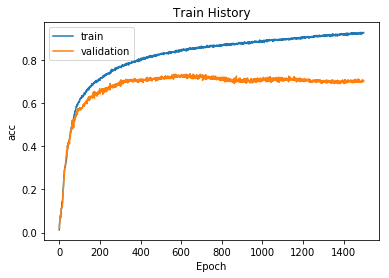

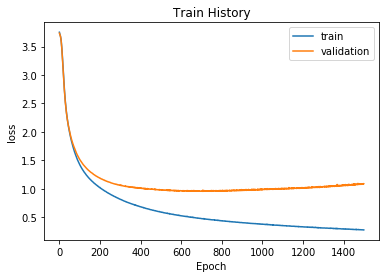

In [155]:
show_train_history(train_history, 'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [156]:
scores = model.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 42us/step


In [157]:
scores[1] * 100

71.32867139814061

### Before saving: are you sure?

In [82]:
model.save_weights("model_71_10_20_42_tanh_100_1000.h5")
#for this
#https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## MUST-SEE: 
* https://www.kaggle.com/randyrose2017/for-beginners-using-keras-to-build-models
* https://medium.com/@pushkarmandot/build-your-first-deep-learning-neural-network-model-using-keras-in-python-a90b5864116d
* https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786
## Just liked:
* https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/
## Full-house:
https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

### 3.3 Question

* Why rerunning with same configuration gives different output?

# 4. Performance Metrics:

In [114]:
import h5py

In [117]:
model_load = Sequential()
model_load.add(Dense(units = 10, 
                input_dim = 71, 
                activation = 'tanh',))
#model_load.add(Dense(units = 10, 
                #activation = 'tanh'))
model_load.add(Dense(units = 20, 
                activation = 'tanh'))
model_load.add(Dense(units = 42, 
                activation = 'softmax'))

In [118]:
model_load.load_weights('/home/amanzhol/Documents/Capstone/MAIN Work/models/model_10_10_20_tanh_100_1000_50.h5')

Why do I need to compile before evaluating?

In [120]:
model_load.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [122]:
evaluation = model_load.evaluate(X_test, Y_test)

429/429 [==============================] - 0s 34us/step


In [123]:
evaluation[1] * 100

81.35198137976907

### State-of-the-art on this dataset (accuarcy)

Results of Ms. Asma Salem

<img src='AsmaSalemResults.png'>

In [129]:
#model prediction
predictions = model_load.predict(X_test)

In [83]:
predictions = model.predict(X_test)

In [84]:
Y_pred = (predictions > 0.5)

In [85]:
Y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [86]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 4.1 Confusion Matrix

Implementing confustion matrix from source:
https://stackoverflow.com/questions/50920908/get-confusion-matrix-from-a-keras-multiclass-model

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

array([[6, 0, 0, ..., 0, 0, 0],
       [0, 9, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 7, 0, 0],
       [2, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 0, 0, 7]])

In [89]:
confusion = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

### 4.2 FAR, FRR and EER

Source: https://stats.stackexchange.com/questions/272962/are-far-and-frr-the-same-as-fpr-and-fnr-respectively

In [90]:
type(confusion)

numpy.ndarray

In [91]:
confusion.shape

(42, 42)

<img src='ConfusionMatrix.png'>

<img src='PerformanceMetrics.png'>

> Edit:
this is the format for confusion_matrix():
[[TP,FN]
[FP,TN]]
And classification report gives all this

In [92]:
confusion[0].shape

(42,)

In [93]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [101]:
Y_test.shape

(429, 42)

In [102]:
Y_pred.shape

(429, 42)

In [104]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [100]:
perf_measure(Y_test, Y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [96]:
#Thus
TP = 6
FP = 1
TN = 11
FN = 67

In [97]:
def FAR(FP, TN):
    return FP/(FP + TN)

def FRR(FN, TP):
    return FN/(FN + TP)

In [98]:
FAR(FP, TN) * 100

8.333333333333332

In [99]:
FRR(FN, TP) * 100

91.78082191780823

### State-of-the-art on this dataset (Performance Metrics)

Ms. Asma Results
* FAR = 0.3%
* FRR = 1.5%
* EER = 0.9%

### Questions
* How to have several FAR, FRR?

### To read for Confusion Matrix - Get Items FP/FN/TP/TN - Python
* https://datascience.stackexchange.com/questions/28493/confusion-matrix-get-items-fp-fn-tp-tn-python
* https://classeval.wordpress.com/introduction/basic-evaluation-measures/